# seamount roms case, PV inversion

In [1]:
import os,sys
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
path_work = '/home1/datawork/aponte/seamount/'
path_output = path_work+'case1/'

In [3]:
# utils
def open_output(file_out, grd):
    ds = xr.open_dataset(file_out)
    ds = ds.drop(['x','y'])
    ds = ds.assign_coords(x=grd.x, y=grd.y)
    return ds

def vorticity(psi):
    x, y = psi.x, psi.y
    # assumes a uniform grid
    dx, dy = (x.shift(x=1)-x), (y.shift(y=1)-y)
    xi = (psi.shift(x=1)-2.*psi+psi.shift(x=-1))/dx/dx \
         + (psi.shift(y=1)-2.*psi+psi.shift(y=-1))/dy/dy
    return xi

---

## look at inputs

In [4]:
D = []
for f in glob(path_output+'input/*.nc'):
    if '_bg' in f:
        D.append(xr.open_dataset(f).rename({'psi': 'psi_bg', 'q': 'q_bg', 'rho': 'rho_bg'}))
    else:
        D.append(xr.open_dataset(f))
        
ds_in = xr.merge(D)
f0 = ds_in.f0
print(ds_in)

<xarray.Dataset>
Dimensions:  (x: 100, y: 150, zt: 48, zw: 49)
Coordinates:
  * zt       (zt) float32 -98.66334 -98.03482 ... -0.57917213 -0.1250038
  * x        (x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
  * y        (y) float32 99500.0 100500.0 101500.0 ... 247500.0 248500.0
    time     float32 10000000.0
    x_rho    (y, x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
    y_rho    (y, x) float32 99500.0 99500.0 99500.0 ... 248500.0 248500.0
  * zw       (zw) float64 -98.96 -98.36 -97.7 ... -0.9078 -0.3181 2.959e-06
Data variables:
    psi      (zt, y, x) float64 ...
    N2       (zw) float32 ...
    f        (y, x) float32 ...
    f0       float32 ...
    q        (zt, y, x) float64 ...
    rho_bg   (zt, y, x) float32 ...
    psi_bg   (zt, y, x) float32 ...
    q_bg     (zt, y, x) float32 ...
    dxt      (y, x) float32 ...
    dyt      (y, x) float32 ...
    dxu      (y, x) float32 ...
    dyu      (y, x) float32 ...
    dxv      (y, x) float32 ...
  

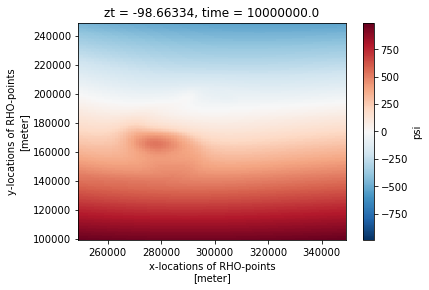

In [5]:
ds_in.psi.isel(zt=0).plot()

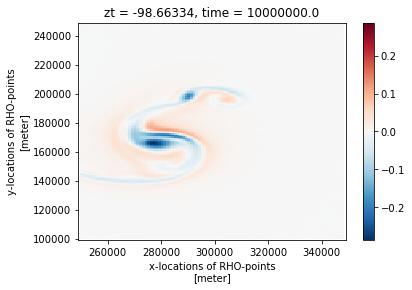

In [6]:
zeta_in = vorticity(ds_in.psi.isel(zt=0))
(zeta_in/f0).plot()

---

## look at outputs

In [25]:
ds_out = open_output(path_output+'output/output_full.nc', ds_in)
zeta_out = vorticity(ds_out.psi.isel(z=0))
ds_bsqg = open_output(path_output+'output/output_bsqg.nc', ds_in)
zeta_bsqg = vorticity(ds_bsqg.psi.isel(z=0))
print(ds_out)

<xarray.Dataset>
Dimensions:  (t: 1, x: 100, y: 150, z: 48)
Coordinates:
  * z        (z) float64 -98.66 -98.03 -97.34 -96.59 ... -1.303 -0.5792 -0.125
    time     float32 10000000.0
  * x        (x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
  * y        (y) float32 99500.0 100500.0 101500.0 ... 247500.0 248500.0
Dimensions without coordinates: t
Data variables:
    mask     (y, x) float64 ...
    psi      (t, z, y, x) float64 ...
    q        (t, z, y, x) float64 ...


[]

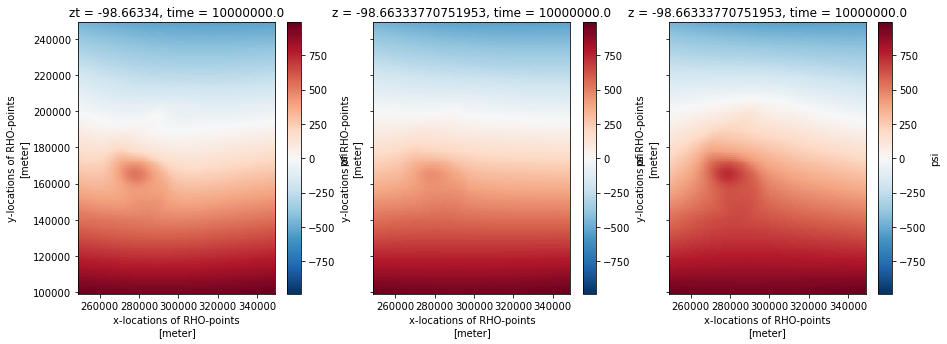

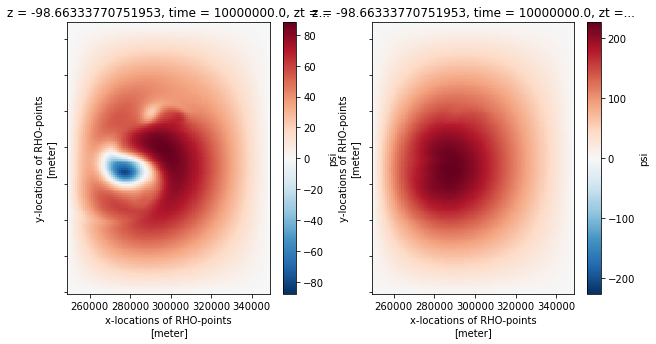

In [24]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
ds_in.psi.isel(zt=0).plot(ax=ax)
ax = fig.add_subplot(1,3,2)
ds_out.psi.isel(z=0).plot(ax=ax)
ax.set_yticklabels([])
ax = fig.add_subplot(1,3,3)
ds_bsqg.psi.isel(z=0).plot(ax=ax)
ax.set_yticklabels([])


# differences
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
(ds_out.psi.isel(z=0) - ds_in.psi.isel(zt=0)).plot(ax=ax)
ax.set_yticklabels([])
ax = fig.add_subplot(1,2,2)
(ds_bsqg.psi.isel(z=0) - ds_in.psi.isel(zt=0)).plot(ax=ax)
ax.set_yticklabels([])

[]

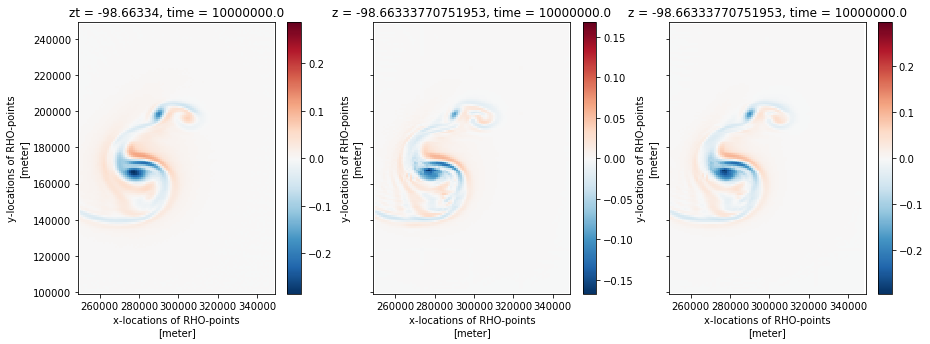

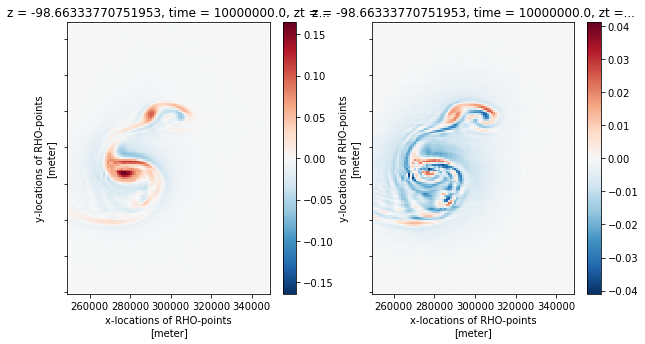

In [27]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
(zeta_in/f0).plot(ax=ax)
ax = fig.add_subplot(1,3,2)
(zeta_out/f0).plot(ax=ax)
ax.set_yticklabels([])
ax = fig.add_subplot(1,3,3)
(zeta_bsqg/f0).plot(ax=ax)
ax.set_yticklabels([])


# differences
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
((zeta_out - zeta_in)/f0).plot(ax=ax)
ax.set_yticklabels([])
ax = fig.add_subplot(1,2,2)
((zeta_bsqg - zeta_in)/f0).plot(ax=ax)
ax.set_yticklabels([])